# Import Modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the Dataset

In [4]:
s = pd.read_csv('train.tsv', sep='\t', on_bad_lines='skip')

In [5]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


# Exploratry Data Analysis

In [5]:
s.shape

(156060, 4)

In [6]:
s.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [7]:
s.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [8]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [9]:
type(s)

pandas.core.frame.DataFrame

In [10]:
s['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [11]:
s['Sentiment'].value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

Text(0.5, 0, 'Sentiment')

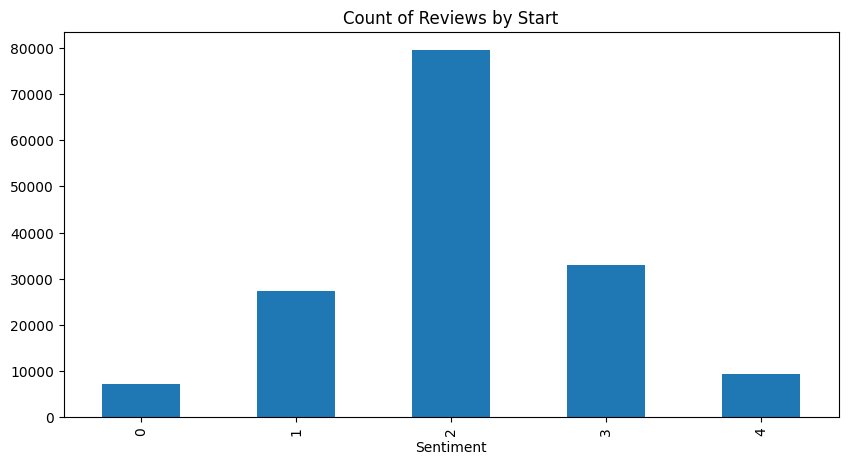

In [14]:
plt = s['Sentiment'].value_counts().sort_index() \
    .plot(kind = 'bar' ,
          title = 'Count of Reviews by Start' ,
          figsize = (10,5))
plt.set_xlabel('Sentiment')

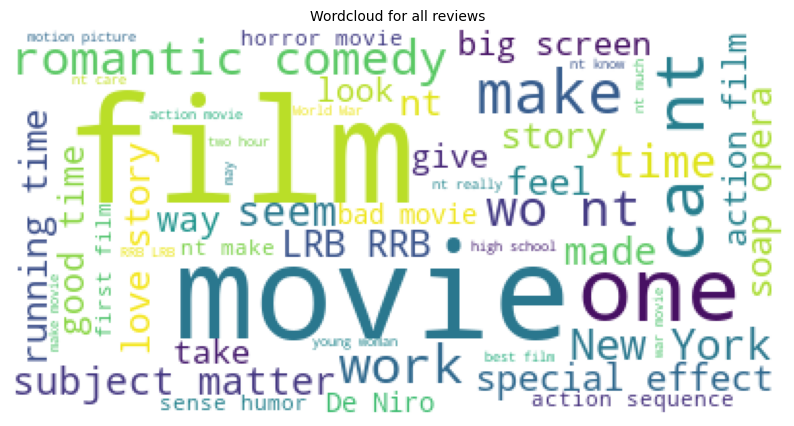

In [41]:
from wordcloud import WordCloud
reviews = " ".join([str(review) if isinstance(review, list) else review for review in s['Phrase']])
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing the Data

1. Lowercase the String

In [21]:
s['Phrase'] = s['Phrase'].str.lower()

In [13]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [15]:
s.Phrase[6]

'of'

In [16]:
columns_to_print = ['Phrase']
print(s[columns_to_print])

                                                   Phrase
0       A series of escapades demonstrating the adage ...
1       A series of escapades demonstrating the adage ...
2                                                A series
3                                                       A
4                                                  series
...                                                   ...
156055                                          Hearst 's
156056                          forced avuncular chortles
156057                                 avuncular chortles
156058                                          avuncular
156059                                           chortles

[156060 rows x 1 columns]


In [17]:
s['Phrase'].shape


(156060,)

2. Remove HTML Tags

In [18]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [21]:
s['Phrase'] = s['Phrase'].apply(remove_html_tags)

In [23]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


3. Remove URL

In [24]:
def remove_url(text):
    pattern = re.compile(r'https?"//\S+')
    return pattern.sub(r'', text)

In [26]:
s['Phrase'] = s['Phrase'].apply(remove_url)

In [28]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


4. Remove Punctuation


In [29]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
exclude = string.punctuation

In [31]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [33]:
start = time.time()
s['Phrase'] = s['Phrase'].apply(remove_punc1)
end = time.time()
take_time = end - start
print(take_time) 

0.7730698585510254


In [34]:
s['Phrase'] = s['Phrase'].apply(remove_punc1)

In [35]:
s['Phrase'][3]

'A'

5. Remove Stop Words

In [38]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from nltk.corpus import stopwords

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import nltk
from nltk.corpus import stopwords

In [44]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)  # Corrected this line
    return " ".join(new_text)


In [45]:
s['Phrase'] = s['Phrase'].apply(remove_stopwords)

In [46]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series escapades demonstrating adage good go...,1
1,2,1,A series escapades demonstrating adage good goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [49]:
s.Phrase[6]

''

# Different Technique to convert categorial data into Numerical data

1. Bag of Words

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [51]:
bow = cv.fit_transform(s['Phrase'])

In [52]:
print(cv.vocabulary_)

{'series': 12667, 'escapades': 4849, 'demonstrating': 3728, 'adage': 341, 'good': 6163, 'goose': 6187, 'also': 603, 'gander': 5919, 'occasionally': 9827, 'amuses': 676, 'none': 9684, 'amounts': 667, 'much': 9380, 'story': 13760, 'this': 14510, 'quiet': 11312, 'introspective': 7596, 'entertaining': 4773, 'independent': 7291, 'worth': 16191, 'seeking': 12513, 'even': 4911, 'fans': 5227, 'ismail': 7676, 'merchant': 8991, 'work': 16155, 'suspect': 14119, 'would': 16195, 'hard': 6536, 'time': 14610, 'sitting': 13008, 'one': 9917, 'positively': 10826, 'thrilling': 14551, 'combination': 2767, 'ethnography': 4892, 'intrigue': 7586, 'betrayal': 1471, 'deceit': 3590, 'murder': 9407, 'shakespearean': 12739, 'tragedy': 14781, 'juicy': 7860, 'soap': 13240, 'opera': 9958, 'aggressive': 488, 'selfglorification': 12567, 'manipulative': 8752, 'whitewash': 15991, 'comedydrama': 2781, 'nearly': 9542, 'epic': 4807, 'proportions': 11116, 'rooted': 12094, 'sincere': 12973, 'performance': 10444, 'title': 146

In [53]:
print(len(cv.vocabulary_))

16347


In [54]:
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
s.sample(18)

,PhraseId,SentenceId,Phrase,Sentiment
137591,137592,7443,selfdestructiveness many young people,1
86641,86642,4488,crushing disappointment,1
31851,31852,1492,occasional slowness due primarily perkiness Wi...,2
100852,100853,5297,wellacted television melodrama,3
68351,68352,3468,take,2
39494,39495,1886,Texan director George Ratliff unlimited access...,2
50390,50391,2477,explosion gunfight,2
140972,140973,7645,longer monopoly mindless action,2
136366,136367,7373,poorly,1
111277,111278,5899,country,2


In [56]:
X_train, X_test, y_train, y_test = train_test_split(bow, s['Sentiment'], test_size=0.2, random_state=42)

## Logistic Regression for Bag of Words

In [59]:
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.6435345379982058

## Naive Bayes for Bag of Words

In [61]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [62]:
pred = mnb.predict(X_test)

In [65]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6132256824298347
[[  409   704   263    38     2]
 [  356  2401  2447   296    27]
 [  108  1359 12315  1730   127]
 [   20   230  2582  3429   446]
 [    1    24   272  1040   586]]
              precision    recall  f1-score   support

           0       0.46      0.29      0.35      1416
           1       0.51      0.43      0.47      5527
           2       0.69      0.79      0.73     15639
           3       0.52      0.51      0.52      6707
           4       0.49      0.30      0.38      1923

    accuracy                           0.61     31212
   macro avg       0.53      0.47      0.49     31212
weighted avg       0.60      0.61      0.60     31212



2. TF-IDF(Term Frequency - Inverse Document Frequency )

In [67]:
X = s['Phrase']
y = s['Sentiment']

In [68]:
X.shape

(156060,)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

## Naive Bayes for TF-IDF

In [70]:
cv = TfidfVectorizer()
X_train_vec = cv.fit_transform(X_train)  
X_test_vec = cv.transform(X_test)  
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)


MultinomialNB()

In [71]:

pred = mnb.predict(X_test_vec)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.5885877226707676
[[   62   640   693    21     0]
 [   34  1563  3748   182     0]
 [    9   682 13880  1050    18]
 [    0    87  3815  2757    48]
 [    0     5   649  1160   109]]
              precision    recall  f1-score   support

           0       0.59      0.04      0.08      1416
           1       0.53      0.28      0.37      5527
           2       0.61      0.89      0.72     15639
           3       0.53      0.41      0.46      6707
           4       0.62      0.06      0.10      1923

    accuracy                           0.59     31212
   macro avg       0.58      0.34      0.35     31212
weighted avg       0.58      0.59      0.54     31212



In [73]:
pd.DataFrame(np.c_[y_test, pred], columns=["Actual", "Predicted"])

,Actual,Predicted
0,2,2
1,4,3
2,2,2
3,2,2
4,1,2
...,...,...
31207,3,2
31208,2,2
31209,2,2
31210,2,2


In [37]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


3. Word2Vec

In [7]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [8]:
s['Phrase'] = s['Phrase'].apply(gensim.utils.simple_preprocess)

In [9]:
X = s['Phrase']
y = s['Sentiment']

In [10]:
X

0         [series, of, escapades, demonstrating, the, ad...
1         [series, of, escapades, demonstrating, the, ad...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

In [11]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2,
    workers = 4
)

In [12]:
model.build_vocab(s['Phrase'])

In [13]:
model.epochs

5

In [14]:
model.corpus_count

156060

In [15]:
model.train(s['Phrase'], total_examples = model.corpus_count, epochs = model.epochs)

(4090317, 5032495)

In [16]:
model.wv['forced']

array([-0.10861032,  0.2913813 ,  0.21902665, -0.15874436,  0.24985841,
       -0.5502722 , -0.26101115,  0.27775717,  0.44086525, -0.4351425 ,
       -0.01485413,  0.01700593, -0.4061728 , -0.2141257 ,  0.44581103,
       -0.05154975, -0.17030744,  0.43131232, -0.39356622, -0.18856113,
        0.16110182, -0.32966575,  0.13080914, -0.23760748,  0.9574691 ,
        0.76622033,  0.27295446,  0.24556766, -0.44089213, -0.21595079,
        0.5551755 ,  0.22464518,  0.35214892, -0.42550865, -0.30424148,
       -0.20545   ,  0.36490476, -0.45434147,  0.15190628,  0.12420107,
       -0.13926302, -0.21295318,  0.12923543, -0.77575505,  0.25825703,
       -0.38497874, -0.12550773, -0.03422357,  0.02587485,  0.27711076,
        0.50032604, -0.01495206,  0.02864267,  0.11765373,  0.58791876,
        0.686148  , -0.11008605, -0.18866476,  0.0314877 , -0.54295754,
        0.00676918,  0.16948617, -0.47119352,  0.35126933, -0.11075848,
        0.26876134, -0.20791915, -0.4825352 , -0.08174647, -0.12

In [17]:
model.wv.most_similar("central")

[('strategic', 0.813976526260376),
 ('pumpkin', 0.8065920472145081),
 ('demeanour', 0.7923766374588013),
 ('veiling', 0.7850727438926697),
 ('resolutions', 0.7803365588188171),
 ('solipsism', 0.7776815891265869),
 ('striving', 0.7766433358192444),
 ('principal', 0.7755275964736938),
 ('explosive', 0.7743523120880127),
 ('primary', 0.7743217349052429)]

In [18]:
model.wv.similarity(w1 = "central", w2 = "series")

0.13426828

In [19]:
s

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"[series, of, escapades, demonstrating, the, ad...",1
1,2,1,"[series, of, escapades, demonstrating, the, ad...",2
2,3,1,[series],2
3,4,1,[],2
4,5,1,[series],2
...,...,...,...,...
156055,156056,8544,[hearst],2
156056,156057,8544,"[forced, avuncular, chortles]",1
156057,156058,8544,"[avuncular, chortles]",3
156058,156059,8544,[avuncular],2


In [72]:
print(f"Original X dataset length: {len(X)}")
print(f"Original y dataset length: {len(y)}")


Original X dataset length: 156060
Original y dataset length: 156060


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(y_train)

22538     1
99237     2
60377     0
128317    2
20776     1
         ..
119879    2
103694    2
131932    3
146867    3
121958    2
Name: Sentiment, Length: 124848, dtype: int64


# Train Models and find accuracy

# 1. SVM(Support Vector Machine)

In [26]:
X = [' '.join(sublist) if isinstance(sublist, list) else sublist for sublist in X]

vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6294053569140075
              precision    recall  f1-score   support

           0       0.56      0.22      0.32      1416
           1       0.52      0.40      0.45      5527
           2       0.68      0.85      0.75     15639
           3       0.56      0.50      0.53      6707
           4       0.62      0.22      0.33      1923

    accuracy                           0.63     31212
   macro avg       0.59      0.44      0.48     31212
weighted avg       0.61      0.63      0.61     31212



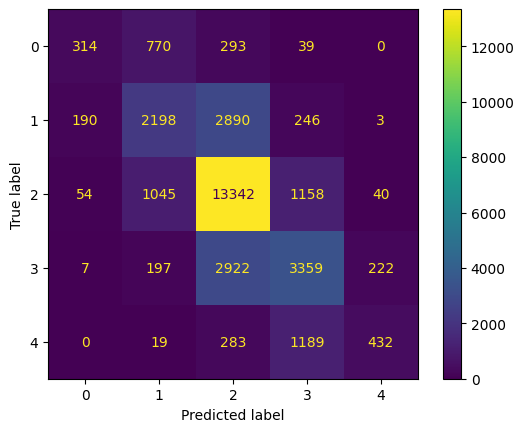

In [36]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_test))
cm_display.plot()
plt.show()

In [513]:
!pip install wordcloud

# 2. Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)  # Vectorize X before splitting

# Split the vectorized data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.630558759451493
              precision    recall  f1-score   support

           0       0.62      0.19      0.29      1416
           1       0.54      0.35      0.42      5527
           2       0.66      0.89      0.76     15639
           3       0.57      0.47      0.52      6707
           4       0.62      0.23      0.34      1923

    accuracy                           0.63     31212
   macro avg       0.60      0.43      0.47     31212
weighted avg       0.62      0.63      0.60     31212



In [40]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.681620850954761


In [66]:
y_train.shape

(124848,)

In [34]:
s['Sentiment'].shape

(156060,)

In [36]:
s.tail(20)

,PhraseId,SentenceId,Phrase,Sentiment
156040,156041,8544,"is darkly atmospheric , with Herrmann quietly ...",2
156041,156042,8544,"is darkly atmospheric , with Herrmann quietly ...",2
156042,156043,8544,"is darkly atmospheric ,",2
156043,156044,8544,is darkly atmospheric,3
156044,156045,8544,with Herrmann quietly suggesting the sadness a...,2
156045,156046,8544,Herrmann quietly suggesting the sadness and ob...,2
156046,156047,8544,Herrmann,2
156047,156048,8544,quietly suggesting the sadness and obsession b...,1
156048,156049,8544,suggesting the sadness and obsession beneath H...,2
156049,156050,8544,suggesting the sadness and obsession,2


In [37]:
y_train

22538     1
99237     2
60377     0
128317    2
20776     1
         ..
119879    2
103694    2
131932    3
146867    3
121958    2
Name: Sentiment, Length: 124848, dtype: int64

# 3. Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train
             , y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train, y_train))

Training Accuracy : 0.8760412661796745


In [89]:
y_pred = model_rf.predict(X_train_transformed)


In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)

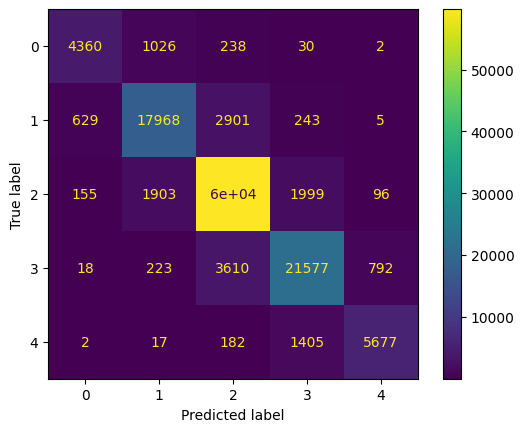

In [91]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

# 4. XG Boost Classifier

In [618]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.1/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 3.1/124.9 MB 6.4 MB/s eta 0:00:20
   - -------------------------------------- 5.2/124.9 MB 7.4 MB/s eta 0:00:17
   -- ------------------------------------- 6.8/124.9 MB 8.1 MB/s eta 0:00:15
   -- ------------------------------------- 8.7/124.9 MB 8.1 MB/s eta 0:00:15
   --- ------------------------------------ 10.5/124.9 MB 8.1 MB/s eta 0:00:15
   --- ------------------------------------ 12.3/124.9 MB 8.1 MB/s eta 0:00:14
   ---- ----------------------------------- 14.9/124.9 MB 8.6 MB/s eta 0:00:13
   ----- ---------------------------------- 16.8/124.9 MB 8.7 MB/s eta 0:00:13
   ------ --------------------------------- 18.9/124.9 MB 9.0 MB/s eta 0:00:12
   ------ --------------------------------- 20.7/124.9 MB 9.0 MB/s

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [94]:
print("Training Accuracy :", model_xgb.score(X_train_transformed, y_train))


Training Accuracy : 0.6066817249775728


In [ ]:
y_preds = model_xgb.predict(X_train) 
cm = confusion_matrix(y_train, y_preds)
print(cm)


[[ 1173   669  3560   249     5]
 [  244  3567 17208   714    13]
 [   39   595 62179  1093    37]
 [    8   213 18651  6986   362]
 [    0    79  3502  1864  1838]]


<function matplotlib.pyplot.show(close=None, block=None)>

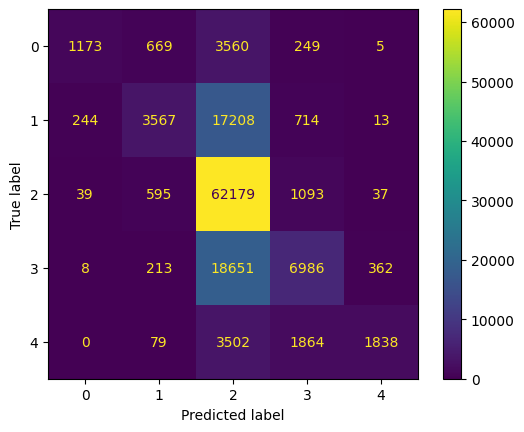

In [96]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model_xgb.classes_)
cm_display.plot()
plt.show

# 5. Decision Tree Classifier

In [41]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
print("Training Accuracy :", model_dt.score(X_train, y_train))


Training Accuracy : 0.8540465205690119


In [45]:
y_preds = model_dt.predict(X_train)

In [46]:
cm = confusion_matrix(y_train, y_preds)

In [47]:
print(cm)

[[ 5092   447    98    18     1]
 [ 1508 18463  1616   156     3]
 [  428  4041 58368  1060    46]
 [   48   527  5402 19959   284]
 [   10    38   375  2116  4744]]


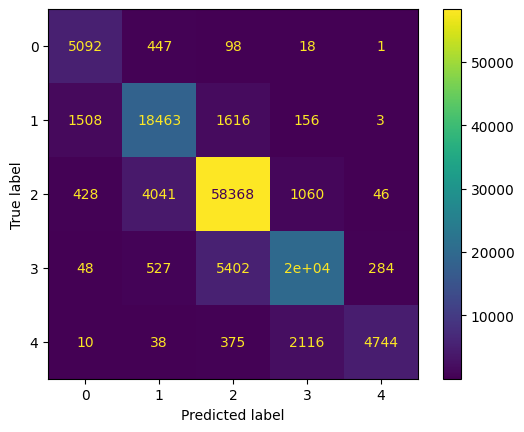

In [48]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_dt.classes_)
cm_display.plot()
plt.show()